# Étape 1 : Compréhension du métier d'œuvre

#### Objectifs :
- Augmenter le chiffre d'affaires de l'entreprise de distribution
- Améliorer la satisfaction client

#### Parties prenantes clés :
- L'entreprise de distribution commerciale
- Les clients (détenteurs de cartes de fidélité)

# Étape 2 : Compréhension des données

#### Dans cette étape, nous allons importer le fichier CSV "panier.csv", examiner les variables (champs) et effectuer une analyse exploratoire des données.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from sklearn.cluster import KMeans
#pip install pygwalker

In [7]:
# Importation des données
df = pd.read_csv('panier.csv', encoding='latin-1')

In [8]:
import pygwalker as pyg

In [10]:
walker = pyg.walk(df)

Box(children=(HTML(value='<div id="ifr-pyg-00061587f4d83c14URuyvigwcrQq4mTV" style="height: auto">\n    <head>…

In [3]:
# Affichage des 5 premières lignes
print(df.head())

   No_carte  montant paiement sexe locataire  revenu  age fruits_légumes  \
0     39808  42.7123   CHEQUE    M        NO   27000   46              F   
1     67362  25.3567     CASH    F        NO   30000   28              F   
2     10872  20.6176     CASH    M        NO   13200   36              F   
3     26748  23.6883     CARD    F        NO   12200   26              F   
4     91609  18.8133     CARD    M       YES   11000   24              F   

  boucherie produits_laitiers conserves_legume conserves_viande surgelés  \
0         T                 T                F                F        F   
1         T                 F                F                F        F   
2         F                 F                T                F        T   
3         F                 T                F                F        F   
4         F                 F                F                F        F   

  bière vin soda poisson confiseries  
0     F   F    F       F           T  
1     F 

In [4]:
#Description de la base
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   No_carte           1000 non-null   int64  
 1   montant            1000 non-null   float64
 2   paiement           1000 non-null   object 
 3   sexe               1000 non-null   object 
 4   locataire          1000 non-null   object 
 5   revenu             1000 non-null   int64  
 6   age                1000 non-null   int64  
 7   fruits_légumes     1000 non-null   object 
 8   boucherie          1000 non-null   object 
 9   produits_laitiers  1000 non-null   object 
 10  conserves_legume   1000 non-null   object 
 11  conserves_viande   1000 non-null   object 
 12  surgelés           1000 non-null   object 
 13  bière              1000 non-null   object 
 14  vin                1000 non-null   object 
 15  soda               1000 non-null   object 
 16  poisson            1000 n

In [5]:
# Statistiques descriptives
print(df.describe())

            No_carte      montant        revenu          age
count    1000.000000  1000.000000   1000.000000  1000.000000
mean    60405.704000    29.398240  20171.800000    32.840000
std     29494.202111    11.555366   5767.558365    10.342793
min     10150.000000    10.007000  10200.000000    16.000000
25%     34577.000000    19.057800  15275.000000    24.000000
50%     60629.500000    29.430550  20150.000000    32.000000
75%     87003.750000    39.127025  25100.000000    42.000000
max    109884.000000    49.886300  30000.000000    50.000000


# Visualisation

## Analyse univariée

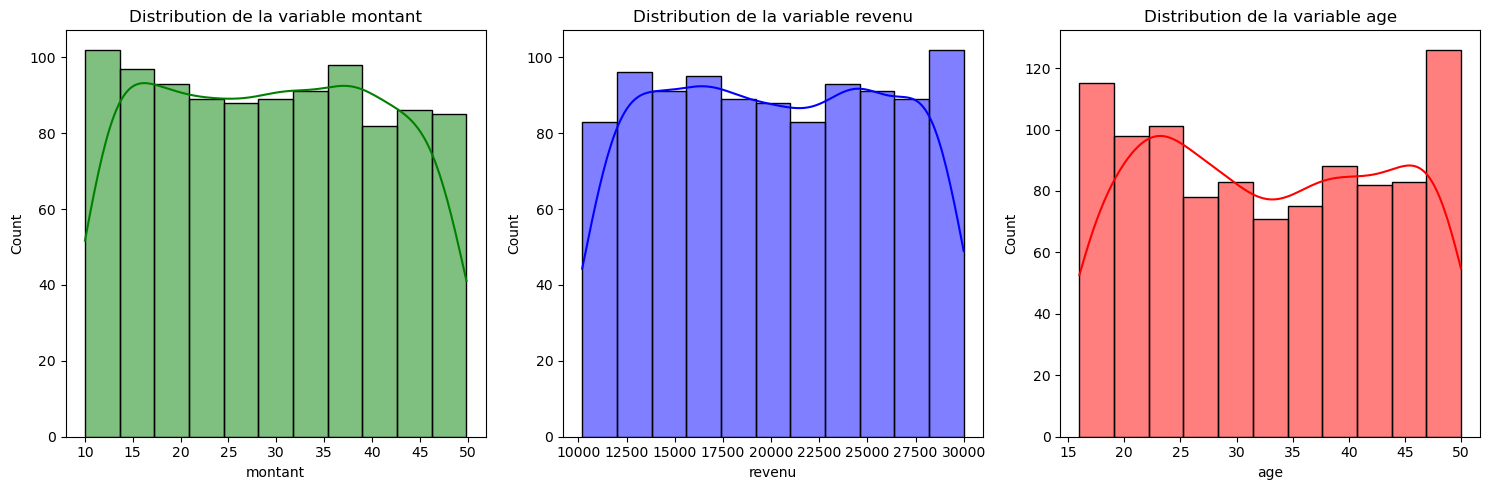

In [8]:
# Variables numériques
numeric_vars = ['montant', 'revenu', 'age']
colors = ['#008000', '#0000FF', '#FF0000']

# Créer une figure et des axes
fig, axes = plt.subplots(1, len(numeric_vars), figsize=(15, 5))

# Itérer sur les variables et afficher l'histogramme sur chaque axe
for i, var in enumerate(numeric_vars):
    sns.histplot(data=df, x=var, kde=True, color=colors[i], ax=axes[i])
    axes[i].set_title(f"Distribution de la variable {var}")

# Ajuster la disposition
plt.tight_layout()
plt.show()



## Interprétation des histogrammes (Image fournie)

**Montant:**

L'histogramme du montant présente une distribution unimodale légèrement asymétrique à droite.

On observe également une queue de distribution plus longue à droite, indiquant la présence de quelques valeurs élevées.

**Interprétation:**

* La plupart des clients ont des paniers d'un montant relativement faible.
* Une petite proportion de clients a des paniers d'un montant élevé, ce qui peut correspondre à des achats ponctuels ou à des clients qui ont des besoins spécifiques.

**Revenu:**

L'histogramme du revenu présente une distribution bimodale. 

La distribution est également légèrement asymétrique à droite.

**Interprétation:**

* Il semble y avoir deux groupes distincts de clients en fonction de leur revenu : un groupe avec un revenu moyen et un groupe avec un revenu élevé.

**Age:**

L'histogramme de l'âge présente une distribution unimodale symétrique.

**Interprétation:**

* La clientèle est majoritairement composée d'adultes.
* La tranche d'âge la plus représentée est celle des 40-50 ans, ce qui peut correspondre à la période de vie où les foyers ont le plus de besoins en termes de consommation.

**Remarques générales:**

* Les trois histogrammes présentent une certaine hétérogénéité dans les distributions, ce qui est attendu pour des données réelles.
* L'analyse des histogrammes permet d'identifier des tendances générales et de formuler des hypothèses sur la population étudiée.
* Il est important de croiser ces informations avec d'autres sources de données pour obtenir une compréhension plus complète du comportement des clients.

**En conclusion, l'analyse des histogrammes des variables montant, revenu et âge permet de dégager des insights précieux sur la clientèle. Ces informations peuvent être utilisées pour adapter la stratégie marketing et commerciale en fonction des segments de clientèle identifiés.**

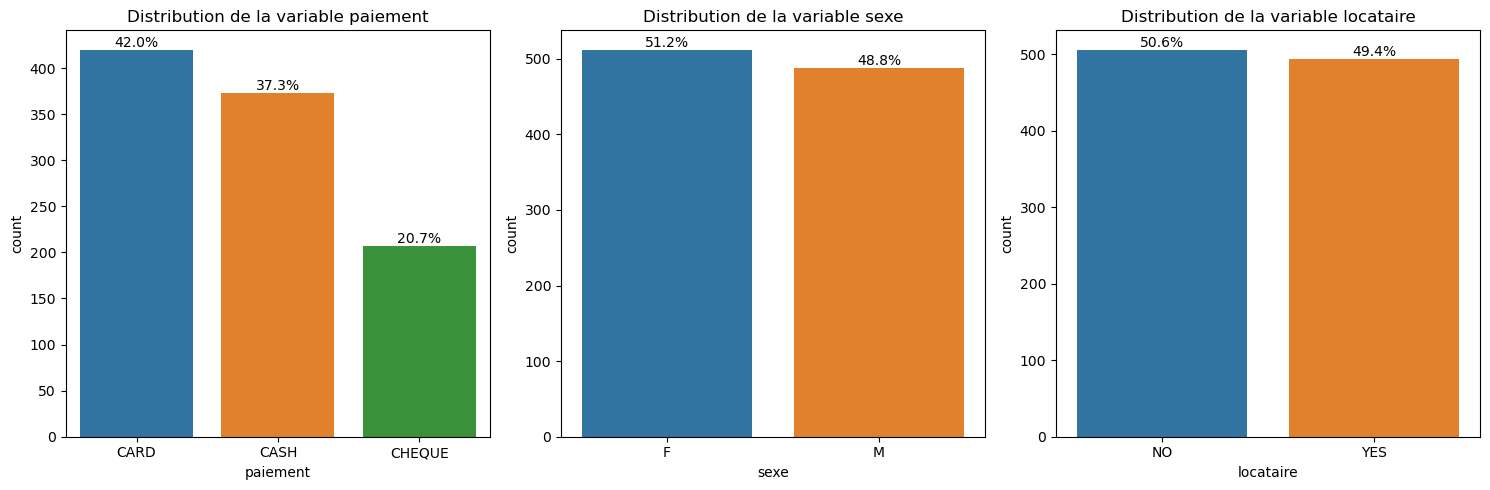

In [27]:
# Variables catégorielles
categorical_vars = ['paiement', 'sexe', 'locataire']
# Créer une figure et des axes
fig, axes = plt.subplots(1, len(categorical_vars), figsize=(15, 5))

# Itérer sur les variables et afficher le graphique de distribution sur chaque axe
for i, var in enumerate(categorical_vars):
    sns.countplot(data=df, x=var, ax=axes[i])
    axes[i].set_title(f"Distribution de la variable {var}")
    # Afficher le pourcentage au-dessus de chaque barre
    for p in axes[i].patches:
        height = p.get_height()
        axes[i].annotate(f"{height / 10:.1f}%", (p.get_x() + p.get_width()/2, height), ha="center", va="bottom")

# Ajuster la disposition
plt.tight_layout()
plt.show()

## Interprétation

Nous avons trois diagrammes à barres représentant la distribution de trois variables catégorielles :

**1. Distribution de la variable "paiement"**
* On remarque que le mode de paiement le plus utilisé est "CARD" (environ 42%).
* Les modes de paiement "CASH" et "CHEQUE" sont moins utilisés, avec environ 37% et 21% respectivement.

**2. Distribution de la variable "sexe"**

* Le graphique montre la répartition des hommes et des femmes dans l'ensemble de données.
* On remarque que les femmes sont légèrement plus nombreuses que les hommes dans l'ensemble de données (environ 51% contre 49%).

**3. Distribution de la variable "locataire"**

* On remarque que la plus part de nos clients ne sont pas locataire (environ 51% NON contre 49% OUI).

# Analyse multivariée

#### Nous allons visualiser les relations entre certaines paires de variables à l'aide de graphiques de dispersion et de diagrammes de régression.

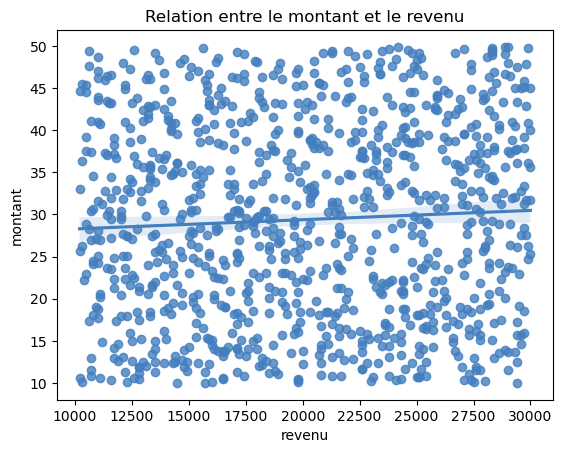

In [31]:
# Relation entre le montant et le revenu
plt.figure()
sns.regplot(data=df, x="revenu", y="montant", color="#437ebe")
plt.title("Relation entre le montant et le revenu")
sns.set_palette("husl")
plt.show()

#### Interprétation des résultats :

La pente de la ligne de régression est positive, indiquant une augmentation du montant avec le revenu.

En moyenne, les clients ayant un revenu plus élevé dépensent plus d'argent par transaction.

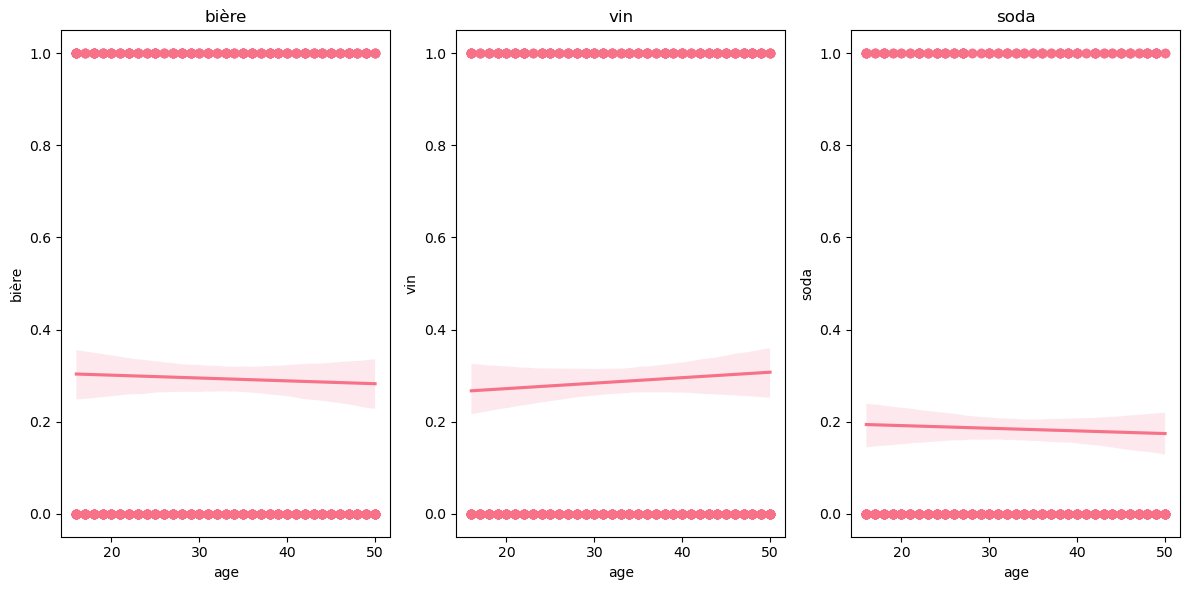

In [52]:
# Relation entre l'âge et la consommation de produits
from sklearn.preprocessing import LabelEncoder

# Encoder les variables catégorielles de produits
product_vars = ['bière', 'vin', 'soda']
le = LabelEncoder()
for var in product_vars:
    df[var] = le.fit_transform(df[var])

plt.figure(figsize=(12, 6))
for i, product in enumerate(['bière', 'vin', 'soda'], start=1):
    plt.subplot(1, 3, i)
    sns.regplot(data=df, x="age", y=product)
    plt.title(product)
plt.tight_layout()
plt.show()

#### Interprétation des résultats :

1. Relation entre l'âge et la consommation de bière

La pente de la ligne de régression est positive, indiquant une augmentation de la consommation de bière avec l'âge.

2. Relation entre l'âge et la consommation de vin

La pente de la ligne de régression est positive, indiquant une augmentation de la consommation de vin avec l'âge.

3. Relation entre l'âge et la consommation de soda

La pente de la ligne de régression est négative, indiquant une diminution de la consommation de soda avec l'âge.

Interprétation globale:

La consommation de bière et de vin semble augmenter avec l'âge, tandis que la consommation de soda semble diminuer.

# Étape 3 : Préparation des données

#### Dans cette étape, nous allons nettoyer les données en supprimant/remplaçant les valeurs manquantes/aberrantes, transformer les données si nécessaire (encodage, normalisation, etc.) et sélectionner/formater les variables pertinentes.

In [53]:
# Vérification des valeurs manquantes
print(df.isnull().sum())

No_carte             0
montant              0
paiement             0
sexe                 0
locataire            0
revenu               0
age                  0
fruits_légumes       0
boucherie            0
produits_laitiers    0
conserves_legume     0
conserves_viande     0
surgelés             0
bière                0
vin                  0
soda                 0
poisson              0
confiseries          0
dtype: int64


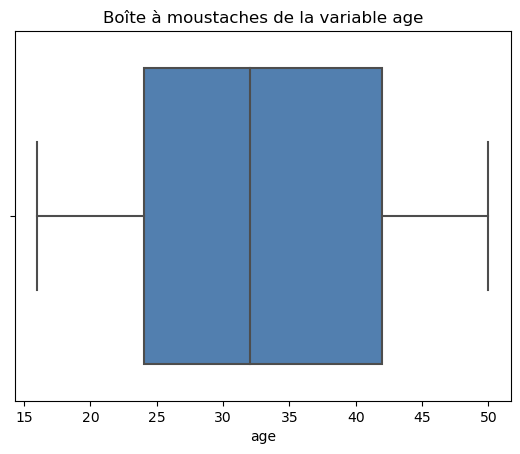

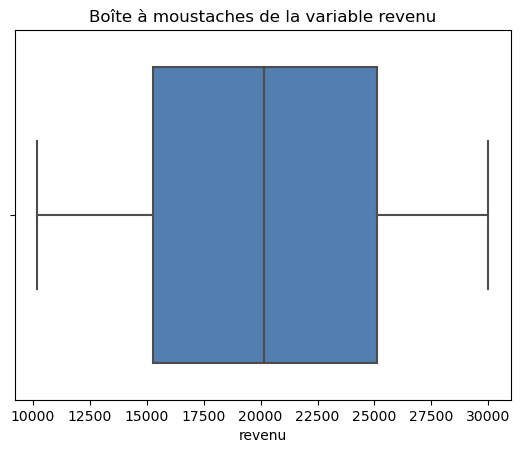

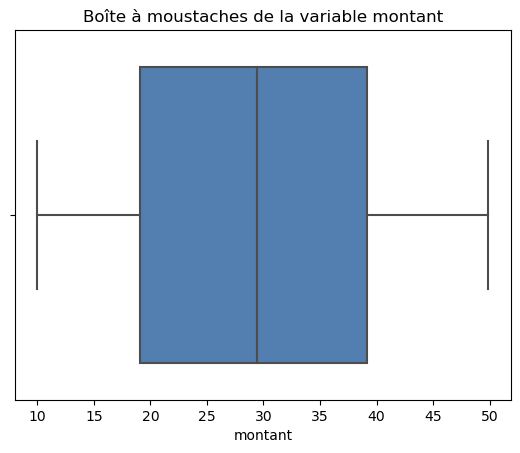

In [54]:
# Gestion des valeurs abbérantes
variables = ['age', 'revenu', 'montant']
for var in variables:
    plt.figure()
    sns.boxplot(data=df, x=var, color="#437ebe")
    plt.title(f"Boîte à moustaches de la variable {var}")
    plt.show()

In [55]:
# Encodage des variables catégorielles
categorical_vars = ['paiement', 'sexe', 'locataire']
for var in categorical_vars:
    df[var] = df[var].astype('category')
    df[var] = df[var].cat.codes

In [56]:
# Sélection des variables pertinentes
selected_vars = ['montant', 'paiement', 'sexe', 'locataire', 'revenu', 'age',
                 'fruits_légumes', 'boucherie', 'produits_laitiers', 'conserves_legume',
                 'conserves_viande', 'surgelés', 'bière', 'vin', 'soda', 'poisson', 'confiseries']

In [57]:
# Nouvelle base de données avec uniquement les variables pertinantes à l'analyse
df = df[selected_vars]

In [58]:
# Affichage des 5 premières lignes de la nouvelle base
print(df.head())

   montant  paiement  sexe  locataire  revenu  age fruits_légumes boucherie  \
0  42.7123         2     1          0   27000   46              F         T   
1  25.3567         1     0          0   30000   28              F         T   
2  20.6176         1     1          0   13200   36              F         F   
3  23.6883         0     0          0   12200   26              F         F   
4  18.8133         0     1          1   11000   24              F         F   

  produits_laitiers conserves_legume conserves_viande surgelés  bière  vin  \
0                 T                F                F        F      0    0   
1                 F                F                F        F      0    0   
2                 F                T                F        T      1    0   
3                 T                F                F        F      0    1   
4                 F                F                F        F      0    0   

   soda poisson confiseries  
0     0       F           

# Étape 4 : Modélisation

#### Dans cette étape, nous allons appliquer des techniques d'analyse des règles d'association pour identifier les produits fréquemment achetés ensemble (requête 1), et des techniques de clustering pour déterminer les profils clients par groupe de produits (requête 2).

## Requête 1 : Produits fréquemment achetés ensemble (règles d'association)


In [59]:
# Encodage des variables en booléen
basket_encoded = df[['conserves_legume', 'surgelés', 'bière']].replace({'F': False, 'T': True})

In [60]:
# Calcul des ensembles d'éléments fréquents
frequent_products = apriori(basket_encoded.astype(bool), min_support=0.05, use_colnames=True)

In [61]:
# Filtrage des ensembles de longueur 3
frequent_products['length'] = frequent_products['itemsets'].apply(lambda x: len(x))
frequent_products = frequent_products[frequent_products['length'] == 3]

In [62]:
# Tri par support décroissant
frequent_products = frequent_products.sort_values(by='support', ascending=False)

In [63]:
# Affichage des trois ensembles les plus fréquents
print("Les produits les plus achetés ensemble sont :")
print(frequent_products.head(3))

Les produits les plus achetés ensemble sont :
   support                             itemsets  length
6    0.146  (surgelés, conserves_legume, bière)       3


## Requête 2 : Profils clients  (clustering)

In [64]:
# Encoder les variables catégorielles
categorical_vars = ['fruits_légumes', 'boucherie', 'produits_laitiers', 'conserves_legume',
                    'conserves_viande', 'surgelés', 'bière', 'vin', 'soda', 'poisson', 'confiseries']

le = LabelEncoder()
for var in categorical_vars:
    df[var] = le.fit_transform(df[var])

In [65]:
# Création de la colonne "acheteur"
def est_acheteur(conserves_legume, surgelés, bière):
  
  if conserves_legume == 1 and surgelés == 1 and bière == 1:
    return "OUI"
  else:
    return "NON"

# Ajout de la colonne "acheteur"
df["acheteur"] = df.apply(lambda row: est_acheteur(row["conserves_legume"], row["surgelés"], row["bière"]), axis=1)

# Affichage des 5 premières lignes
print(df.head())

   montant  paiement  sexe  locataire  revenu  age  fruits_légumes  boucherie  \
0  42.7123         2     1          0   27000   46               0          1   
1  25.3567         1     0          0   30000   28               0          1   
2  20.6176         1     1          0   13200   36               0          0   
3  23.6883         0     0          0   12200   26               0          0   
4  18.8133         0     1          1   11000   24               0          0   

   produits_laitiers  conserves_legume  conserves_viande  surgelés  bière  \
0                  1                 0                 0         0      0   
1                  0                 0                 0         0      0   
2                  0                 1                 0         1      1   
3                  1                 0                 0         0      0   
4                  0                 0                 0         0      0   

   vin  soda  poisson  confiseries acheteur  
0   

### Modélisation par le clustering

In [66]:
# Sélection des variables pour le clustering
cluster_vars = ['revenu', 'age', 'fruits_légumes', 'boucherie', 'produits_laitiers', 'conserves_legume',
                'conserves_viande', 'surgelés', 'bière', 'vin', 'soda', 'poisson', 'confiseries']
X = df[cluster_vars]

In [29]:
# Application de l'algorithme k-means
kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)
kmeans.fit(X)
df['cluster'] = kmeans.labels_

ValueError: could not convert string to float: 'F'

In [121]:
print("Caractéristiques des clusters :")
for cluster in range(4):
    print(f"Cluster {cluster}:")
    print(df[df['cluster'] == cluster][cluster_vars].mean())
    print()

Caractéristiques des clusters :
Cluster 0:
revenu               27924.107143
age                     32.812500
fruits_légumes           0.303571
boucherie                0.245536
produits_laitiers        0.183036
conserves_legume         0.165179
conserves_viande         0.174107
surgelés                 0.227679
bière                    0.196429
vin                      0.401786
soda                     0.200893
poisson                  0.343750
confiseries              0.334821
dtype: float64

Cluster 1:
revenu               12847.727273
age                     32.174242
fruits_légumes           0.295455
boucherie                0.185606
produits_laitiers        0.185606
conserves_legume         0.503788
conserves_viande         0.234848
surgelés                 0.500000
bière                    0.492424
vin                      0.162879
soda                     0.185606
poisson                  0.299242
confiseries              0.189394
dtype: float64

Cluster 2:
revenu             

## Interprêtation des résultats

**Ces résultats représentent les caractéristiques moyennes de chaque cluster identifié par l'algorithme k-means.**

**Cluster 0 :**

Revenu moyen élevé (27924)

Âge moyen de 32 ans environ

Consommation supérieure à la moyenne de vin, poisson et confiseries

Consommation inférieure à la moyenne de fruits/légumes, boucherie, produits laitiers et conserves

Ce cluster semble représenter des clients aisés, plutôt jeunes, avec une préférence pour le vin, le poisson et les confiseries.

**Cluster 1 :**

Revenu moyen faible (12847)

Âge moyen de 32 ans environ

Consommation élevée de conserves (légumes et viande), surgelés et bière

Consommation faible de vin

Ce cluster pourrait correspondre à des clients à budget plus serré, privilégiant les produits moins chers comme les conserves, surgelés et la bière.

**Cluster 2 :**

Revenu moyen modéré (18011)

Âge moyen de 33 ans environ

Consommation globalement équilibrée entre les différents produits, sans extrêmes

Ce cluster semble représenter des clients aux habitudes de consommation assez équilibrées, sans fortes préférences particulières.

**Cluster 3 :**

Revenu moyen élevé (23224)

Âge moyen de 33 ans environ

Consommation élevée de vin, confiseries et fruits/légumes

Consommation faible de boucherie et surgelés

Ce dernier cluster pourrait correspondre à des clients aisés, plutôt jeunes, avec des préférences pour des produits frais comme les fruits/légumes, le vin et les confiseries, et moins intéressés par la boucherie et les surgelés.

En résumé, ces résultats permettent d'identifier différents segments de clientèle avec des profils de revenus, d'âges et de préférences de consommation variés. L'entreprise pourrait ainsi adapter ses stratégies marketing et commerciales en fonction de ces différents groupes de clients.

## Stratégie Data-Driven

Sur la base de ces résultats de segmentation de la clientèle, voici 4 stratégies data-driven que l'entreprise de distribution pourrait mettre en place :

1. **Stratégie de marketing ciblé par segment**

En fonction des caractéristiques de chaque cluster, l'entreprise peut concevoir des campagnes marketing personnalisées et des offres promotionnelles adaptées. Par exemple :

- Cluster 0 (clients aisés) : Promotion sur les vins de qualité, les produits haut de gamme (poisson, confiseries).
- Cluster 1 (clients à budget serré) : Offres attractives sur les conserves, surgelés, bières économiques.
- Cluster 2 (consommation équilibrée) : Paniers diversifiés avec une sélection de différents produits. 
- Cluster 3 (clients aisés, produits frais) : Mises en avant des fruits/légumes de saison, vins, confiseries haut de gamme.

2. **Optimisation de l'aménagement des rayons**

En analysant les habitudes d'achat de chaque segment, l'entreprise peut organiser stratégiquement le positionnement des produits dans le magasin :

- Placer les produits fréquemment achetés ensemble dans des rayons proches (règles d'association).
- Créer des rayons thématiques par segment (ex: rayon "petit budget", "produits frais/bien-être").
- Exposer les produits à fort potentiel de vente croisée de façon stratégique.

3. **Gestion optimisée des stocks**

Grâce à une meilleure connaissance des préférences de chaque segment, l'entreprise peut ajuster ses niveaux de stock en fonction de la demande anticipée :

- Augmenter les stocks des produits très demandés par certains segments.
- Réduire les stocks des produits peu populaires auprès de la clientèle locale.
- Adapter les commandes et approvisionnements en conséquence.

4. **Programme de fidélisation personnalisé**

L'entreprise pourrait créer un programme de fidélisation avec des avantages et récompenses adaptés à chaque segment :

- Cluster 0 : Invitations à des dégustations de vins, accès à des produits exclusifs.
- Cluster 1 : Remises régulières sur les produits basiques, coupons multi-achats.
- Cluster 2 : Programme généraliste avec des points/récompenses sur tous les achats.
- Cluster 3 : Avantages sur les produits frais, accès à des marchés de producteurs locaux.

Ces stratégies, basées sur les données clients et les insights tirés de l'analyse, permettraient à l'entreprise d'améliorer l'expérience client, d'augmenter ses ventes et sa rentabilité en ciblant plus efficacement les différents segments de sa clientèle.